<a href="https://colab.research.google.com/github/rahulgupta743/Enhance-the-dark/blob/main/finalCWCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn.cluster as cluster
import seaborn as sns
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


In [3]:
data =  np.load('cluster_data.npy')

In [4]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [6]:
data_pd  = pd.DataFrame(data)

In [7]:
data_pd

,0,1
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075
...,...,...
2304,-0.063610,0.013804
2305,0.284742,0.301998
2306,0.502431,-0.300296
2307,0.538223,0.194122


lets check if there is any null data

In [9]:
data_pd.isnull().any()

0    False
1    False
dtype: bool

THERE IS NO NULL DATA

check the mean , median and stats of data

In [10]:
data_pd.mean()

0    0.015312
1    0.011602
dtype: float64

In [11]:
data_pd.median()

0    0.010938
1   -0.027871
dtype: float64

SCATTER THE DATA

In [12]:
data.shape

(2309, 2)

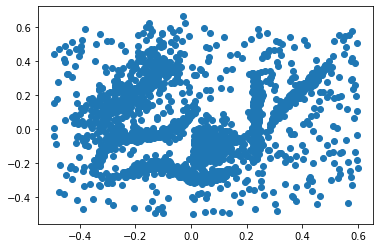

In [13]:
plt.scatter(data[:,0],data[:,1] )

In [14]:
import time
def plot_clusters(data, algorithm):
  start_time = time.time()
  labels = algorithm.fit_predict(data)
  print(labels)
  print(len(np.unique(labels)))
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
 # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time))
  
  print(validation_score(data , labels))

Standardizing THE DATA


In [15]:
from sklearn.preprocessing import StandardScaler

def data_standardizer(data):
  scaler = StandardScaler().fit(data)
  standard_data = StandardScaler().fit_transform(data)
  return standard_data



In [16]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [17]:
data_std = data_standardizer(data)

**validation metrics for clustering**


In [18]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
def validation_score(data , labels):
  print("calinski harabasz score is " , calinski_harabasz_score(data , labels))
  print("silhouette_score" , silhouette_score(data , labels))
  print("davies bouldin score ",davies_bouldin_score(data , labels))


  

**ELBOW METHOD FOR KMEANS**

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.cluster import KMeans
inertia_values = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std) 
    inertia_values.append(kmeans.inertia_)


In [21]:
inertia_values

[4617.999999999996,
 2821.158556124011,
 1607.5529138055422,
 1166.1110381825456,
 968.9705006354518,
 817.3845930304276,
 691.4966417678577,
 592.5933171214693,
 519.325004355058]

now we are plotting the cluster values with their inertia

Text(0, 0.5, 'inertia values')

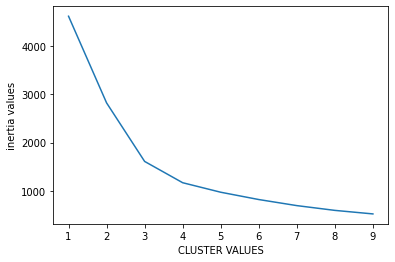

In [22]:
plt.plot(range(1,10) , inertia_values)
plt.xlabel("CLUSTER VALUES")
plt.ylabel("inertia values")

from this elbow chart , we can say that the optimal value for number of cluster is 3

# **KMEANS**





[2 2 2 ... 0 0 2]
3
calinski harabasz score is  2159.2168367790237
silhouette_score 0.46500977321005704
davies bouldin score  0.7422270188304924
None


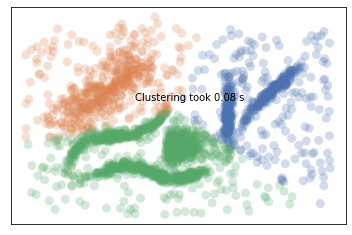

In [23]:

from sklearn.cluster import KMeans
import time
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42 )
plot_clusters(data_standardizer(data) , kmeans)


# ,() , {'n_clusters': 3, 'init':'k-means++', 'n_init':10, 'max_iter':300, 'tol':0.0001, 'verbose':0}) 

# **AFFINITY** **PROPOGATION**

[3 3 1 ... 1 0 1]
4
calinski harabasz score is  2262.9364441505763
silhouette_score 0.4258284992577059
davies bouldin score  0.8274386817974535
None


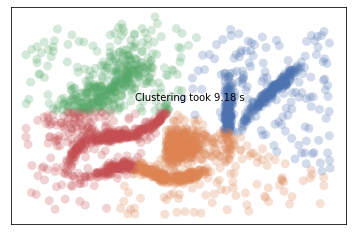

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
Affinity_clustering = AffinityPropagation(damping = 0.7 , affinity = 'euclidean' , preference = -300, max_iter=400)

plot_clusters(data_std , Affinity_clustering)


# **MEAN SHIFT ALGORITHM FOR CLUSTERING**

0.23392424409997176
[0 0 0 ... 2 2 0]
3
calinski harabasz score is  2012.0062970470692
silhouette_score 0.42684451904942083
davies bouldin score  0.8272181293134514
None


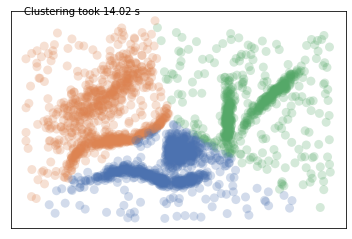

In [24]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500)
print(bandwidth)
MS =  MeanShift(bandwidth=bandwidth)
plot_clusters(data , MS)
#cluster_centers = MS.cluster_centers_

In [25]:
print(len(MS.cluster_centers_))

3


# **Agglomerative** **clustering**

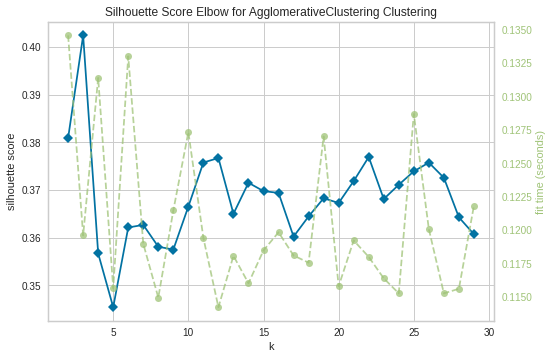

Optimal number of clusters based on silhouette score: [3]


In [26]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
AGC = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(AGC, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_std)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df['scores'] = visualizer.k_scores_
df1 = df[df.scores == df.scores.max()]
print('Optimal number of clusters based on silhouette score:', df1['centers'].tolist())

[0 0 0 ... 0 2 0]
3
calinski harabasz score is  1490.9123989175553
silhouette_score 0.40244815791908284
davies bouldin score  0.7320556453263745
None


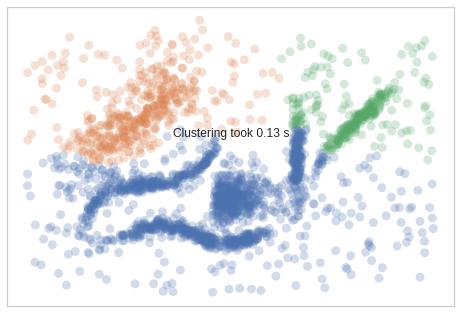

In [27]:
from sklearn.cluster import AgglomerativeClustering

AGC = AgglomerativeClustering(n_clusters = 3, affinity='euclidean')

plot_clusters(data_standardizer(data) , AGC)


# **HDBSCAN CLUSTERING**

In [29]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340663 sha256=2586b14c23572c757065aeffc21690339e073783350d7a87ad8cc9429b695101
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
Successfully built hdbscan


In [ ]:
# #hdb = hdbscan.HDBSCAN(metric='euclidean')
# import sys
# print(sys.getrecursionlimit())
# sys.setrecursionlimit(1500)

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import silhouette_score
 
# def silhouette_score( X,labels):
    
#     score = silhouette_score(X, labels)
#     return score
# grid_values = {'min_cluster_size': ['20','25','30','35'],'cluster_selection_epsilon':[0.15,0.20,0.25,0.3,0.35]}
# grid_search= RandomizedSearchCV(hdb1, param_grid = grid_values,scoring = silhouette_score( data_std, labels_hdb))
# grid_search.fit(data_std,labels_hdb)




1500


RecursionError: ignored

[ 2  2  2 ... -1 -1  2]
4
calinski harabasz score is  487.0620798540668
silhouette_score 0.27276912531052094
davies bouldin score  2.4066730133348035
None


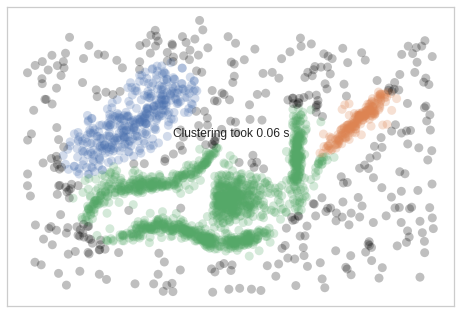

In [30]:

import hdbscan
hdb = hdbscan.HDBSCAN(metric='euclidean', min_cluster_size=35,cluster_selection_epsilon=0.25)
plot_clusters(data_standardizer(data) , hdb)

# **SPECTRAL CLUSTERING**

[1 1 1 ... 1 0 1]
3
calinski harabasz score is  1913.152762778777
silhouette_score 0.44828709902447583
davies bouldin score  0.7200390863140709
None


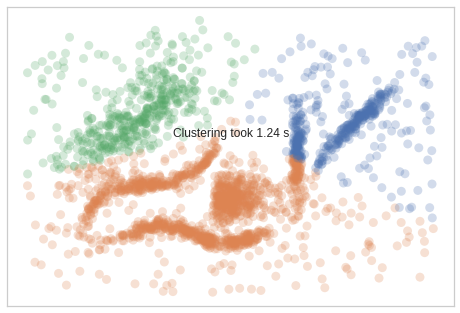

In [32]:
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
SC = SpectralClustering(n_clusters = 3,affinity='rbf', random_state=121) 
plot_clusters(data_std ,SC)
   

In [ ]:
affinity_matrix = getAffinityMatrix(data, k = 3)


In [ ]:
labels_kmeans = kmeans.fit_predict(data)
validation_score(data , labels_kmeans)

calinski harabasz score is  2164.5050050014806
silhouette_score 0.46319107032549806
davies bouldin score  0.750132742885747


In [ ]:
labels_kmeans = kmeans.fit_predict(data)
validation_score(data , labels_kmeans)